## TITANIC DATASET

In [1]:
! cd data ; wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2020-06-11 12:03:05--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv.3’

titanic.csv.3       100%[===================>]  43.19K   133KB/s    in 0.3s    

2020-06-11 12:03:06 (133 KB/s) - ‘titanic.csv.3’ saved [44225/44225]



----

### Import data

Header file:

0. Survived Indicator
1. Passenger Class {1: '_1', 2: '_2', 3: '_3'}
2. Name
3. Sex
4. Age
5. Siblings Aboard
6. Parents Aboard
7. Fare paid in £s

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import rfpimp

from seaborn import heatmap
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [36]:
titanic = pd.read_csv('data/titanic.csv', sep=',', infer_datetime_format=False)

### First EDA

In [37]:
print('N. osservazioni: %d' % (titanic.shape[0], ))
print('N. features: %d' % (titanic.shape[1], ))

N. osservazioni: 887
N. features: 8


In [38]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


In [39]:
titanic.columns = ['survived', 'class', 'name', 'sex', 'age', 'siblings', 'children', 'fare']

In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  887 non-null    int64  
 1   class     887 non-null    int64  
 2   name      887 non-null    object 
 3   sex       887 non-null    object 
 4   age       887 non-null    float64
 5   siblings  887 non-null    int64  
 6   children  887 non-null    int64  
 7   fare      887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [41]:
titanic.isnull().sum(axis = 0)

survived    0
class       0
name        0
sex         0
age         0
siblings    0
children    0
fare        0
dtype: int64

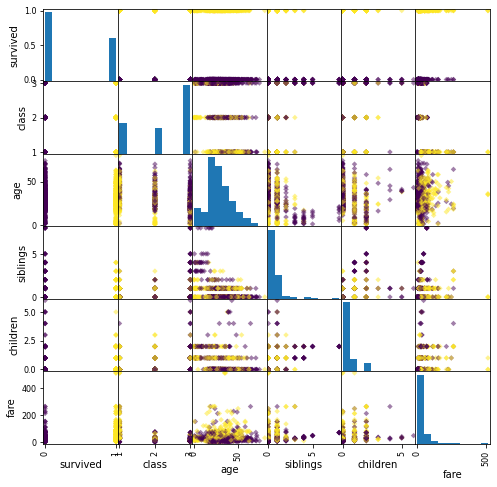

In [42]:
_ = pd.plotting.scatter_matrix(titanic, c = y, figsize = [8, 8], s=15, marker = 'D')

Distribuszione della variabile target: 0 - Morto / 1 - Sopravvissuto
-----
0    545
1    342
Name: survived, dtype: int64
-----


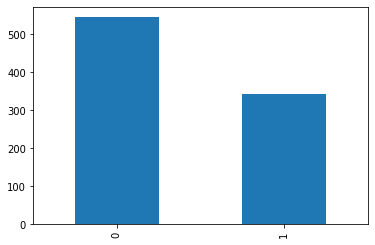

In [43]:
print('Distribuszione della variabile target: 0 - Morto / 1 - Sopravvissuto')
print('-----')
print(titanic['survived'].value_counts())
print('-----')
(titanic['survived'].value_counts()).plot.bar()

Distribuszione della variabile Pclass [class], rispetto alla variabile target: {1a classe, 2a classe, 3a classe}
-----
class       1   2    3
survived              
0          80  97  368
1         136  87  119
=====
Distribuszione della variabile Sex [sex], rispetto alla variabile target: {male, female}
-----
sex       female  male
survived              
0             81   464
1            233   109
=====
Distribuszione della variabile Siblings/Spouses Aboard [siblings], rispetto alla variabile target
-----
siblings    0    1   2   3   4  5  8
survived                            
0         394   97  15  12  15  5  7
1         210  112  13   4   3  0  0
=====
Distribuszione della variabile Parents/Children Aboard [children], rispetto alla variabile target
-----
children    0   1   2  3  4  5  6
survived                         
0         441  53  40  2  4  4  1
1         233  65  40  3  0  1  0
=====


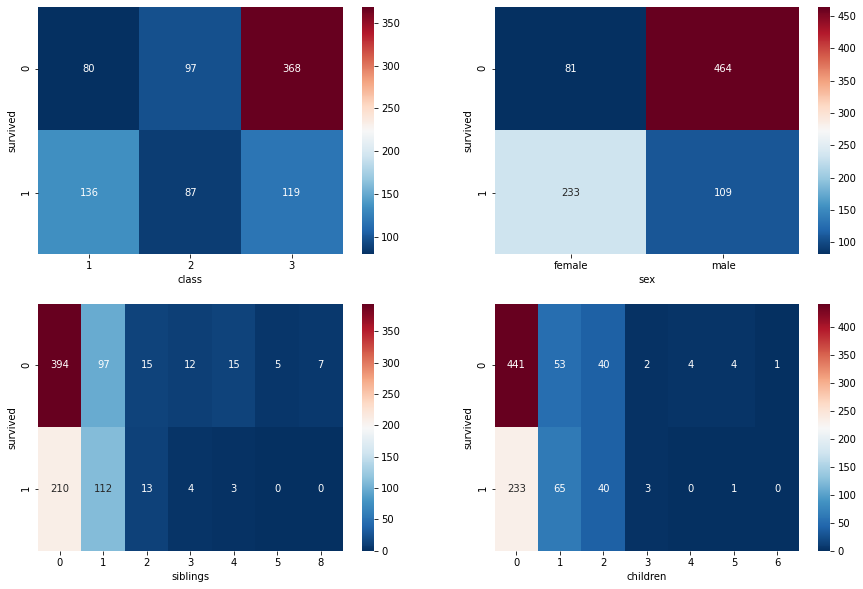

In [44]:
print('Distribuszione della variabile Pclass [class], rispetto alla variabile target: {1a classe, 2a classe, 3a classe}')
print('-----')
class_ct = pd.crosstab(index = titanic['survived'], columns = titanic['class'])
print(class_ct)
print('=====')
print('Distribuszione della variabile Sex [sex], rispetto alla variabile target: {male, female}')
print('-----')
sex_ct = pd.crosstab(index = titanic['survived'], columns = titanic['sex'])
print(sex_ct)
print('=====')
print('Distribuszione della variabile Siblings/Spouses Aboard [siblings], rispetto alla variabile target')
print('-----')
siblings_ct = pd.crosstab(index = titanic['survived'], columns = titanic['siblings'])
print(siblings_ct)
print('=====')
print('Distribuszione della variabile Parents/Children Aboard [children], rispetto alla variabile target')
print('-----')
parents_ct = pd.crosstab(index = titanic['survived'], columns = titanic['children'])
print(parents_ct)
print('=====')



fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 10))

ax1 = sn.heatmap(class_ct, 
           annot=True,
           fmt = '.0f',
           ax = ax1,
           cmap = 'RdBu_r')

ax2 = sn.heatmap(sex_ct, 
           annot=True,
           fmt = '.0f', 
           ax = ax2,
           cmap = 'RdBu_r')

ax3 = sn.heatmap(siblings_ct, 
           annot=True,
           fmt = '.0f',
           ax = ax3,
           cmap = 'RdBu_r')

ax4 = sn.heatmap(parents_ct, 
           annot=True,
           fmt = '.0f', 
           ax = ax4,
           cmap = 'RdBu_r')


In [45]:
print('Rimuovo le colonne non utili: Name')
titanic = titanic.drop('name', axis=1)
titanic.head()

Rimuovo le colonne non utili: Name


,survived,class,sex,age,siblings,children,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [46]:
print('Rimappo class per renderla categorica')
titanic = titanic.replace({'class':{1: '_1', 2: '_2', 3: '_3'}})

Rimappo class per renderla categorica


In [47]:
print('Trasformo in dummy le variabili categoriche: sex, class')
titanic = pd.get_dummies(titanic)
titanic.head()

Trasformo in dummy le variabili categoriche: sex, class


,survived,age,siblings,children,fare,class__1,class__2,class__3,sex_female,sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,1


In [48]:
print('Rimuovo le colonne per evitare collinearità: sex_female, class__1')
titanic = titanic.drop(['sex_male', 'class__1'], axis=1)
titanic.head()

Rimuovo le colonne per evitare collinearità: sex_female, class__1


,survived,age,siblings,children,fare,class__2,class__3,sex_female
0,0,22.0,1,0,7.2500,0,1,0
1,1,38.0,1,0,71.2833,0,0,1
2,1,26.0,0,0,7.9250,0,1,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,0,1,0


In [161]:
y = titanic.survived
X = titanic.drop('survived', axis = 1)

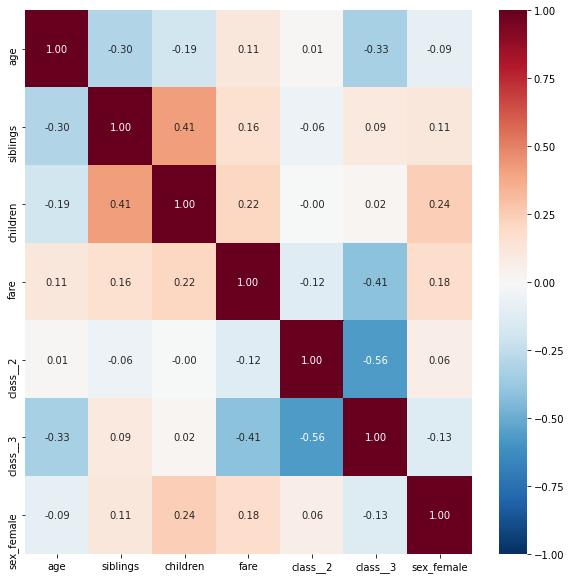

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = heatmap(
    X.corr(), 
    fmt = '.2f', 
    annot = True, 
    ax = ax, 
    cmap = 'RdBu_r',
    vmin = -1, 
    vmax = 1)

In [51]:
print("""
Il metodo della t-sne mostra che i dati sono separabili in 3 gruppi, in due si vede bene la classe di riferimento, mentre nella terza è poco nota
""")


Il metodo della t-sne mostra che i dati sono separabili in 3 gruppi, in due si vede bene la classe di riferimento, mentre nella terza è poco nota



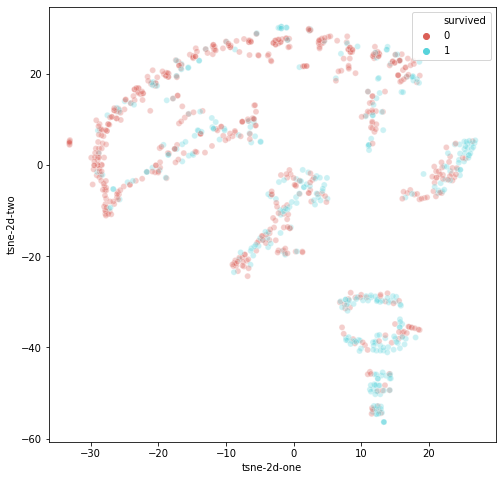

In [52]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X)
titanic_tsne = titanic.copy()

titanic_tsne['tsne-2d-one'] = X_embedded[:,0]
titanic_tsne['tsne-2d-two'] = X_embedded[:,1]

plt.figure(figsize=(8,8))
sn.scatterplot(
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue="survived",
    palette=sn.color_palette("hls", 2),
    data=titanic_tsne,
    legend="full",
    alpha=0.3
)

#### Eseguo al t-sne sui dati normalizzati

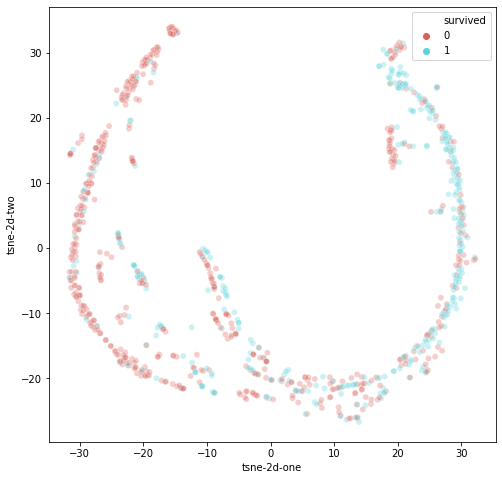

In [53]:
tsne = TSNE()
normalizer = Normalizer()

X_embedded = tsne.fit_transform(pd.DataFrame(normalizer.fit_transform(X), columns=X.columns))
titanic_tsne_norm = titanic.copy()

titanic_tsne_norm['tsne-2d-one'] = X_embedded[:,0]
titanic_tsne_norm['tsne-2d-two'] = X_embedded[:,1]

plt.figure(figsize=(8,8))
sn.scatterplot(
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue="survived",
    palette=sn.color_palette("hls", 2),
    data=titanic_tsne_norm,
    legend="full",
    alpha=0.3
)

In [23]:
print("""
Due possibile stade: 
    1. Feature selection sul dataset e classifico survived --> supervised
    2. Provo a classificare i dati utilizzando la riduzione della t-sne e classifico in base al risutltao del transform sulla t-sne --> unsupervised
""")


Due possibile stade: 
    1. Feature selection sul dataset e classifico survived --> supervised
    2. Provo a classificare i dati utilizzando la riduzione della t-sne e classifico in base al risutltao del transform sulla t-sne --> unsupervised



## FEATURE SELECTION

In [162]:
X = X.drop(['fare','children'], axis = 1)

In [163]:
names = X.columns

#### Stimo una regressione logistica per determinare l'importanza delle variabili del modello

In [164]:
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X, y)
logistic_coef = log_model.coef_
logistic_coef = logistic_coef.reshape(len(X.columns))

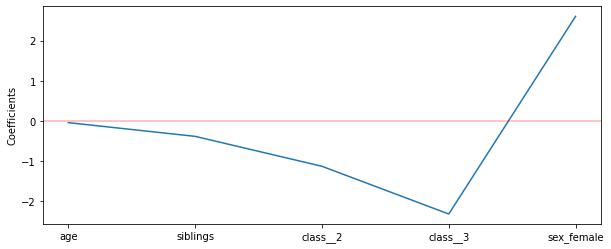

In [165]:
plt.figure(figsize=(10,4))
plt.plot(range(len(names)), logistic_coef)
plt.xticks(range(len(names)), names, rotation=0)
plt.ylabel('Coefficients')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.show()

#### Stimo una regressione Lasso per determinare l'importanza delle variabili del modello

In [166]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

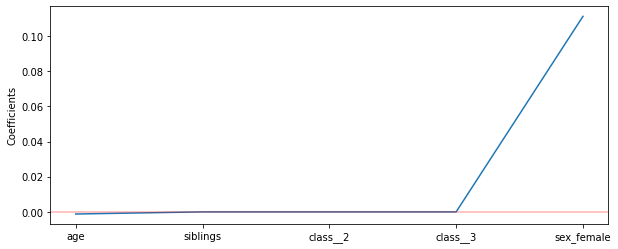

In [167]:
plt.figure(figsize=(10,4))
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=0)
plt.ylabel('Coefficients')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.show()

#### Il risutlato dei modelli è in contrasto. Le variabili su cui concordano sono children, che non influsce sull'output e il sesso che è molto rilevante

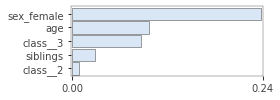

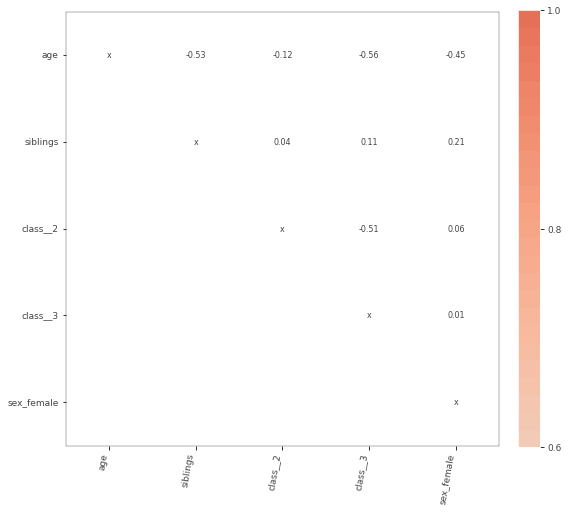

In [168]:
rf = RandomForestClassifier(n_estimators=100,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True)

normalizer = Normalizer()

pipeliene = make_pipeline(normalizer, rf)

pipeliene.fit(X, y)

imp = rfpimp.importances(pipeliene, X, y, n_samples=-1)
viz = rfpimp.plot_importances(imp)
viz.view()

viz_pc = rfpimp.plot_corr_heatmap(pd.DataFrame(normalizer.fit_transform(X), columns=names), figsize=(8, 8))
viz_pc.view()

## Stima dei modelli

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [209]:
class model_summary:
    
    def __init__(self, X_train_set, X_test_set, y_train_set, y_test_set):
        self.X_train_set = X_train_set
        self.y_train_set = y_train_set
        self.X_test_set = X_test_set
        self.y_test_set = y_test_set
        
    def evaluate(self, model):
        print('Train model score: %f' % model.score(self.X_train_set, self.y_train_set))
        print('Test model score: %f' % model.score(self.X_test_set, self.y_test_set))
        y_pred = model.predict(self.X_test_set)
        print('-----')
        print('Confusion matrix')
        
        ct_df = pd.DataFrame({'test': self.y_test_set, 'pred':  y_pred})

        print(pd.crosstab(index = ct_df['test'], columns = ct_df['pred']))
        print('-----')
        print('classification_report')
        print(classification_report(self.y_test_set, y_pred))

        y_prob = model.predict_proba(self.X_test_set)[:,1]
        fpr, tpr, thresholds = roc_curve(self.y_test_set, y_prob)
        plt.figure(figsize=(4,4))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr, label='Logistic Regression')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Logistic Regression ROC Curve - AUC %.3f' % roc_auc_score(self.y_test_set, y_prob))
        plt.show()


In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [210]:
summary = model_summary(X_train, X_test, y_train, y_test)

#### Realizzo un *baseline model* per confrontare le performance dei modelli stimati successivamente

/opt/jupyterhub/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Train model score: 0.508065
Test model score: 0.509363
-----
Confusion matrix
pred   0   1
test        
0     97  69
1     60  41
-----
classification_report
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       166
           1       0.37      0.41      0.39       101

    accuracy                           0.52       267
   macro avg       0.50      0.50      0.49       267
weighted avg       0.53      0.52      0.52       267



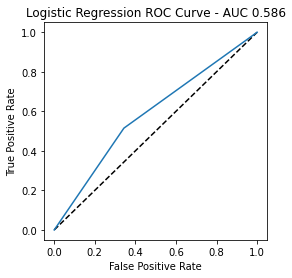

In [211]:
baseline_model = DummyClassifier()
baseline_model.fit(X_train, y_train)

summary.evaluate(baseline_model)

#### Baseline model su dati normalizzati

/opt/jupyterhub/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Train model score: 0.524194
Test model score: 0.475655
-----
Confusion matrix
pred    0   1
test         
0     102  64
1      60  41
-----
classification_report
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       166
           1       0.39      0.41      0.40       101

    accuracy                           0.54       267
   macro avg       0.51      0.51      0.51       267
weighted avg       0.54      0.54      0.54       267



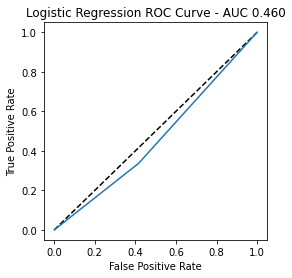

In [212]:
baseline_pipeline = make_pipeline(Normalizer(), DummyClassifier())
baseline_pipeline.fit(X_train, y_train)

summary.evaluate(baseline_pipeline)

## Regressione Logistica

In [173]:
lr = LogisticRegressionCV(cv = 10, max_iter = 1000)
lr_pipeline = make_pipeline(Normalizer(), LogisticRegressionCV(cv = 10, max_iter = 1000))

Train model score: 0.837097
Test model score: 0.775281
-----
Confusion matrix
pred    0   1
test         
0     152  14
1      46  55
-----
classification_report
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       166
           1       0.80      0.54      0.65       101

    accuracy                           0.78       267
   macro avg       0.78      0.73      0.74       267
weighted avg       0.78      0.78      0.76       267



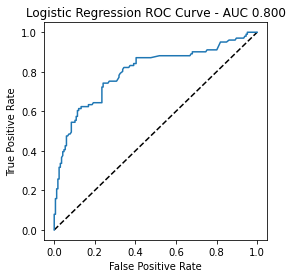

In [213]:
lr.fit(X_train, y_train)
summary.evaluate(lr)

Train model score: 0.829032
Test model score: 0.764045
-----
Confusion matrix
[[155  11]
 [ 52  49]]
-----
classification_report
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       166
           1       0.82      0.49      0.61       101

    accuracy                           0.76       267
   macro avg       0.78      0.71      0.72       267
weighted avg       0.77      0.76      0.75       267



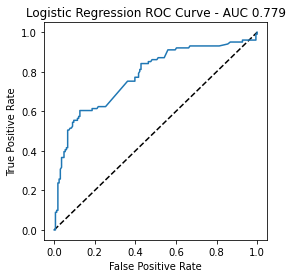

In [175]:
lr_pipeline.fit(X_train, y_train)
summary.evaluate(lr_pipeline)

## K-NN

In [176]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_pipeline = make_pipeline(Normalizer(), KNeighborsClassifier(n_neighbors=5))

Train model score: 0.850000
Test model score: 0.749064
-----
Confusion matrix
[[145  21]
 [ 46  55]]
-----
classification_report
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       166
           1       0.72      0.54      0.62       101

    accuracy                           0.75       267
   macro avg       0.74      0.71      0.72       267
weighted avg       0.75      0.75      0.74       267



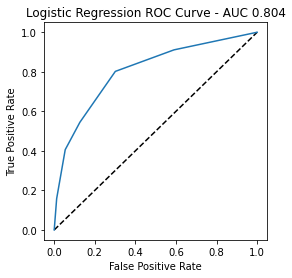

In [177]:
knn.fit(X_train, y_train)
summary.evaluate(knn)

Train model score: 0.827419
Test model score: 0.741573
-----
Confusion matrix
[[133  33]
 [ 36  65]]
-----
classification_report
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       166
           1       0.66      0.64      0.65       101

    accuracy                           0.74       267
   macro avg       0.73      0.72      0.72       267
weighted avg       0.74      0.74      0.74       267



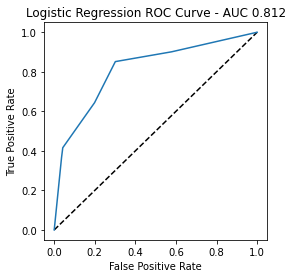

In [178]:
knn_pipeline.fit(X_train, y_train)
summary.evaluate(knn_pipeline)

## DECISION TREE

In [179]:
dt = DecisionTreeClassifier()
dt_pipeline = make_pipeline(Normalizer(), DecisionTreeClassifier())

Train model score: 0.927419
Test model score: 0.760300
-----
Confusion matrix
[[141  25]
 [ 39  62]]
-----
classification_report
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       166
           1       0.71      0.61      0.66       101

    accuracy                           0.76       267
   macro avg       0.75      0.73      0.74       267
weighted avg       0.76      0.76      0.76       267



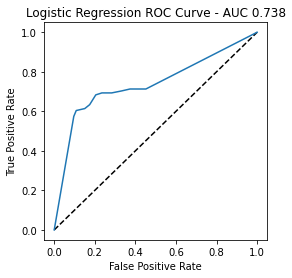

In [180]:
dt.fit(X_train, y_train)
summary.evaluate(dt)

Train model score: 0.909677
Test model score: 0.756554
-----
Confusion matrix
[[147  19]
 [ 46  55]]
-----
classification_report
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       166
           1       0.74      0.54      0.63       101

    accuracy                           0.76       267
   macro avg       0.75      0.72      0.72       267
weighted avg       0.75      0.76      0.75       267



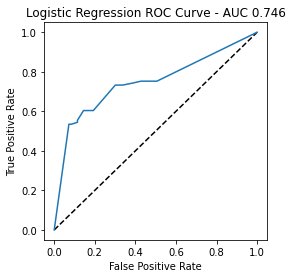

In [181]:
dt_pipeline.fit(X_train, y_train)
summary.evaluate(dt_pipeline)

----

## BINNING DELLE VARIABILI

Provo a rendere categoriche le variabili: 

* sibling -> {0: '0', 1: '1', 2: '2', >2: '3+'}
* children -> {0: '0', 1: '1', 2: '2', >2: '3+'}

e ristimare il modello per la feature selection per vedere se le variabili dicotomiche influiscono sulla variabile target

In [ ]:
X_bin = X.copy()

In [ ]:
max_sibling = np.max(X_bin.siblings) + 1
X_bin['sibling_class'] = pd.cut(X_bin.siblings, [0, 1, 2, 3, max_sibling], labels=['0', '1', '2', '3+'], right=False)

In [ ]:
X_bin = X_bin.drop('siblings', axis = 1)

In [ ]:
max_children = np.max(X_bin.children) + 1
X_bin['children_class'] = pd.cut(X_bin.children, [0, 1, 2, 3, max_children], labels=['0', '1', '2', '3+'], right=False)

In [ ]:
X_bin = X_bin.drop('children', axis = 1)

In [ ]:
X_bin.head()

In [ ]:
X_bin = pd.get_dummies(X_bin)

In [ ]:
X_bin = X_bin.drop(['sibling_class_3+', 'children_class_3+'], axis = 1)

In [ ]:
X_bin.head()

In [ ]:
X_bin_names = X_bin.columns

In [ ]:
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_bin, y)
logistic_coef = log_model.coef_
logistic_coef = logistic_coef.reshape(len(X_bin.columns))

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(range(len(X_bin_names)), logistic_coef)
plt.xticks(range(len(X_bin_names)), X_bin_names, rotation=0)
plt.ylabel('Coefficients')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.show()

In [ ]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X_bin, y).coef_

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(range(len(X_bin_names)), lasso_coef)
plt.xticks(range(len(X_bin_names)), X_bin_names, rotation=0)
plt.ylabel('Coefficients')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.show()

#### END BINNING DELLE VARIABILI

----